In [ ]:
# !pip install xgboost

In [ ]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import VotingClassifier

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv ('D:\year_3\sem_1\Data_mining\project\dataset/datasetupdated.csv')

In [ ]:
data.shape

(3630, 35)

In [ ]:
data.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [ ]:
data.sample(4)

Marital status  Application mode  Application order  Course  \
3375               1                 1                  6       2   
1597               1                 1                  1       9   
674                2                12                  1      17   
1850               1                 8                  3       2   

      Daytime/evening attendance  Previous qualification  Nacionality  \
3375                           1                       1            1   
1597                           1                       1            1   
674                            0                       1            1   
1850                           1                       1            1   

      Mother's qualification  Father's qualification  Mother's occupation  \
3375                      13                      27                    6   
1597                       1                      28                    5   
674                       22                      27                    2   
1850                      13                       1                    6   

      ...  Curricular units 2nd sem (credited)  \
3375  ...                                    0   
1597  ...                                    0   
674   ...                                    0   
1850  ...                                    0   

      Curricular units 2nd sem (enrolled)  \
3375                                    0   
1597                                    5   
674                                     5   
1850                                    0   

      Curricular units 2nd sem (evaluations)  \
3375                                       0   
1597                                       5   
674                                        7   
1850                                       0   

      Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
3375                                    0                               0.0   
1597                                    5                              16.4   
674                                     0                               0.0   
1850                                    0                               0.0   

      Curricular units 2nd sem (without evaluations)  Unemployment rate  \
3375                                               0                9.4   
1597                                               0               11.1   
674                                                0               16.2   
1850                                               0               12.7   

      Inflation rate   GDP    Target  
3375            -0.8 -3.12  Graduate  
1597             0.6  2.02  Graduate  
674              0.3 -0.92   Dropout  
1850             3.7 -1.70  Graduate  

[4 rows x 35 columns]

In [ ]:
data.head()

Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 1                  5       5   
2               1                 9                  4      11   
3               1                 1                  1      10   
4               1                 1                  2      16   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           1                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      13                      10                    6  ...   
1                      22                      27                   10  ...   
2                      22                      27                   10  ...   
3                       1                      14                    5  ...   
4                      13                      27                    5  ...   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    0   
1                                    0                                    6   
2                                    0                                    5   
3                                    0                                    6   
4                                    0                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       0   
2                                       5   
3                                      14   
4                                       0   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                               0.0   
1                                    0                               0.0   
2                                    0                               0.0   
3                                    2                              13.5   
4                                    0                               0.0   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               10.8   
2                                               0               15.5   
3                                               0                8.9   
4                                               0               12.7   

   Inflation rate   GDP   Target  
0             1.4  1.74  Dropout  
1             1.4  1.74  Dropout  
2             2.8 -4.06  Dropout  
3             1.4  3.51  Dropout  
4             3.7 -1.70  Dropout  

[5 rows x 35 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  3630 non-null   int64  
 1   Application mode                                3630 non-null   int64  
 2   Application order                               3630 non-null   int64  
 3   Course                                          3630 non-null   int64  
 4   Daytime/evening attendance                      3630 non-null   int64  
 5   Previous qualification                          3630 non-null   int64  
 6   Nacionality                                     3630 non-null   int64  
 7   Mother's qualification                          3630 non-null   int64  
 8   Father's qualification                          3630 non-null   int64  
 9   Mother's occupation                      

In [ ]:
data.info

<bound method DataFrame.info of       Marital status  Application mode  Application order  Course  \
0                  1                 8                  5       2   
1                  1                 1                  5       5   
2                  1                 9                  4      11   
3                  1                 1                  1      10   
4                  1                 1                  2      16   
...              ...               ...                ...     ...   
3625               1                 1                  1       5   
3626               1                15                  1       5   
3627               1                 1                  6      15   
3628               1                 1                  1       9   
3629               1                 5                  1      15   

      Daytime/evening attendance  Previous qualification  Nacionality  \
0                              1                       1          

In [ ]:
data.rename(columns = {'Nacionality':'Nationality', 'Age at enrollment':'Age','Curricular units 1st sem (credited)':'Curricular_units_1st_sem_credited','Curricular units 1st sem (enrolled)':'Curricular_units_1st_sem_enrolled',
                       'Curricular units 1st sem (evaluations)':'Curricular_units_1st_sem_evaluations',
                       'Curricular units 1st sem (approved)':'Curricular_units_1st_sem_approved',
                       'Curricular units 2nd sem (without evaluations)':'Curricular_units_2nd_sem_evaluations',
                       'Curricular units 2nd sem (grade)':'Curricular_units_2nd_sem_grade',
                       'Educational special needs':'Educational_special_needs',
                       'Tuition fees up to date':'Tuition_fees_up_to_date',
                       'Scholarship holder':'Scholarship_holder',
                       'Unemployment rate':'Unemployment_rate',
                       'Inflation rate':'Inflation_rate',
                      'Target':'Target'}, inplace = True)

In [ ]:
#checking for null values
data.isnull().sum()/len(data)*100

Marital status                                    0.0
Application mode                                  0.0
Application order                                 0.0
Course                                            0.0
Daytime/evening attendance                        0.0
Previous qualification                            0.0
Nationality                                       0.0
Mother's qualification                            0.0
Father's qualification                            0.0
Mother's occupation                               0.0
Father's occupation                               0.0
Displaced                                         0.0
Educational_special_needs                         0.0
Debtor                                            0.0
Tuition_fees_up_to_date                           0.0
Gender                                            0.0
Scholarship_holder                                0.0
Age                                               0.0
International               

In [ ]:
print(data.duplicated().sum())

0


In [ ]:
print(data["Target"].unique())

['Dropout' 'Graduate']


In [ ]:
data['Target'] = data['Target'].map({
    'Dropout':0,
    'Graduate':1
})

In [ ]:
print(data["Target"].unique())

[0 1]


In [ ]:
data

Marital status  Application mode  Application order  Course  \
0                  1                 8                  5       2   
1                  1                 1                  5       5   
2                  1                 9                  4      11   
3                  1                 1                  1      10   
4                  1                 1                  2      16   
...              ...               ...                ...     ...   
3625               1                 1                  1       5   
3626               1                15                  1       5   
3627               1                 1                  6      15   
3628               1                 1                  1       9   
3629               1                 5                  1      15   

      Daytime/evening attendance  Previous qualification  Nationality  \
0                              1                       1            1   
1                              1                       1            1   
2                              1                       1            1   
3                              1                       1            1   
4                              1                       1            1   
...                          ...                     ...          ...   
3625                           1                       1            1   
3626                           1                      14            1   
3627                           1                       1            1   
3628                           1                       1            1   
3629                           1                       1            9   

      Mother's qualification  Father's qualification  Mother's occupation  \
0                         13                      10                    6   
1                         22                      27                   10   
2                         22                      27                   10   
3                          1                      14                    5   
4                         13                      27                    5   
...                      ...                     ...                  ...   
3625                       1                       1                   10   
3626                       3                      28                    4   
3627                       1                       1                    6   
3628                      22                      27                    8   
3629                      23                      27                    6   

      ...  Curricular units 2nd sem (credited)  \
0     ...                                    0   
1     ...                                    0   
2     ...                                    0   
3     ...                                    0   
4     ...                                    0   
...   ...                                  ...   
3625  ...                                    0   
3626  ...                                    5   
3627  ...                                    0   
3628  ...                                    0   
3629  ...                                    0   

      Curricular units 2nd sem (enrolled)  \
0                                       0   
1                                       6   
2                                       5   
3                                       6   
4                                       6   
...                                   ...   
3625                                    6   
3626                                    9   
3627                                    6   
3628                                    5   
3629                                    6   

      Curricular units 2nd sem (evaluations)  \
0                                          0   
1                                          0   
2                                          5   
3                                        

In [ ]:
data.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Nationality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Displaced                                           int64
Educational_special_needs                           int64
Debtor                                              int64
Tuition_fees_up_to_date                             int64
Gender                                              int64
Scholarship_holder                                  int64
Age           

In [ ]:
data.describe()

Marital status  Application mode  Application order       Course  \
count     3630.000000       3630.000000        3630.000000  3630.000000   
mean         1.184298          6.810193           1.750138     9.935537   
std          0.613009          5.253618           1.333831     4.340715   
min          1.000000          1.000000           0.000000     1.000000   
25%          1.000000          1.000000           1.000000     6.000000   
50%          1.000000          8.000000           1.000000    11.000000   
75%          1.000000         12.000000           2.000000    13.000000   
max          6.000000         18.000000           6.000000    17.000000   

       Daytime/evening attendance  Previous qualification  Nationality  \
count                 3630.000000             3630.000000  3630.000000   
mean                     0.887603                2.552617     1.242424   
std                      0.315897                3.952440     1.700394   
min                      0.000000                1.000000     1.000000   
25%                      1.000000                1.000000     1.000000   
50%                      1.000000                1.000000     1.000000   
75%                      1.000000                1.000000     1.000000   
max                      1.000000               17.000000    21.000000   

       Mother's qualification  Father's qualification  Mother's occupation  \
count             3630.000000             3630.000000          3630.000000   
mean                12.558678               16.663636             7.212948   
std                  9.006183               10.993025             3.707343   
min                  1.000000                1.000000             1.000000   
25%                  2.000000                3.000000             5.000000   
50%                 13.000000               14.000000             6.000000   
75%                 22.000000               27.000000            10.000000   
max                 29.000000               34.000000            32.000000   

       ...  Curricular units 2nd sem (credited)  \
count  ...                          3630.000000   
mean   ...                             0.581818   
std    ...                             2.022688   
min    ...                             0.000000   
25%    ...                             0.000000   
50%    ...                             0.000000   
75%    ...                             0.000000   
max    ...                            19.000000   

       Curricular units 2nd sem (enrolled)  \
count                          3630.000000   
mean                              6.296419   
std                               2.263020   
min                               0.000000   
25%                               5.000000   
50%                               6.000000   
75%                               7.000000   
max                              23.000000   

       Curricular units 2nd sem (evaluations)  \
count                             3630.000000   
mean                                 7.763085   
std                                  3.964163   
min                                  0.000000   
25%                                  6.000000   
50%                                  8.000000   
75%                                 10.000000   
max                                 33.000000   

       Curricular units 2nd sem (approved)  Curricular_units_2nd_sem_grade  \
count                          3630.000000                     3630.000000   
mean                              4.518457                       10.036155   
std                               3.162376                        5.481742   
min                               0.000000                        0.000000   
25%                               2.000000                       10.517857   
50%                               5.000000                       12.333333   
75%                               6.000000                       13.500000   
max                 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Separate features and target variable
X = data.drop(columns=['Target'])
y = data['Target']

# Apply Min-Max Scaling
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Create a new DataFrame with the normalized features
data_normalized = pd.DataFrame(X_normalized, columns=X.columns)
data_normalized['Target'] = y  # Add the target column

# Display the first few rows of the normalized data
print("Normalized Data:")
print(data_normalized.head())


Normalized Data:
   Marital status  Application mode  Application order  Course  \
0             0.0          0.411765           0.833333  0.0625   
1             0.0          0.000000           0.833333  0.2500   
2             0.0          0.470588           0.666667  0.6250   
3             0.0          0.000000           0.166667  0.5625   
4             0.0          0.000000           0.333333  0.9375   

   Daytime/evening attendance  Previous qualification  Nationality  \
0                         1.0                     0.0          0.0   
1                         1.0                     0.0          0.0   
2                         1.0                     0.0          0.0   
3                         1.0                     0.0          0.0   
4                         1.0                     0.0          0.0   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                0.428571                0.272727             0.161290  ...   
1      

In [ ]:
# from sklearn.preprocessing import RobustScaler

# # Separate features and target variable
# X = data.drop(columns=['Target'])
# y = data['Target']

# # Apply Robust Scaling
# scaler = RobustScaler()
# X_normalized = scaler.fit_transform(X)

# # Create a new DataFrame with the normalized features and the target column
# data_normalized = pd.DataFrame(X_normalized, columns=X.columns)
# data_normalized['Target'] = y  # Add the target column

# # Display the first few rows of the normalized data with the target column
# print("Robust Scaled Data with Target Column:")
# print(data_normalized.head())

In [ ]:
# import numpy as np
# # Separate features and target variable
# X = data.drop(columns=['Target'])
# y = data['Target']

# # Log Transformation Normalization
# X_log_transformed = np.log1p(X)

# # Create a new DataFrame with the log-transformed features and the target column
# data_normalized= pd.concat([X_log_transformed, y], axis=1)

# # Display the first few rows of the log-transformed data with the target column
# print("Log-Transformed Data with Target Column:")
# print(data_log_transformed.head())

In [ ]:

# # Separate features and target variable
# X = data.drop(columns=['Target'])
# y = data['Target']

# # Decimal Scaling Normalization
# scaled_factor = 10 ** (len(str(X.abs().max().max()).split('.')[0]) - 1)
# X_normalized = X / scaled_factor

# # Create a new DataFrame with the normalized features and the target column
# data_normalized = pd.concat([X_normalized, y], axis=1)

# # Display the first few rows of the normalized data with the target column
# print("Decimal Scaled Data with Target Column:")
# print(data_normalized.head())

In [ ]:
# from sklearn.preprocessing import StandardScaler

# X = data.drop(columns=['Target'])
# y = data['Target']

# # Apply Z-score Normalization
# scaler = StandardScaler()
# X_normalized = scaler.fit_transform(X)

# # Create a new DataFrame with the normalized features and the target column
# data_normalized = pd.DataFrame(X_normalized, columns=X.columns)
# data_normalized['Target'] = y  # Add the target column

# # Display the first few rows of the normalized data with the target column
# print("Z-score Normalized Data with Target Column:")
# print(data_normalized.head())

In [ ]:
data_normalized

Marital status  Application mode  Application order  Course  \
0                0.0          0.411765           0.833333  0.0625   
1                0.0          0.000000           0.833333  0.2500   
2                0.0          0.470588           0.666667  0.6250   
3                0.0          0.000000           0.166667  0.5625   
4                0.0          0.000000           0.333333  0.9375   
...              ...               ...                ...     ...   
3625             0.0          0.000000           0.166667  0.2500   
3626             0.0          0.823529           0.166667  0.2500   
3627             0.0          0.000000           1.000000  0.8750   
3628             0.0          0.000000           0.166667  0.5000   
3629             0.0          0.235294           0.166667  0.8750   

      Daytime/evening attendance  Previous qualification  Nationality  \
0                            1.0                  0.0000          0.0   
1                            1.0                  0.0000          0.0   
2                            1.0                  0.0000          0.0   
3                            1.0                  0.0000          0.0   
4                            1.0                  0.0000          0.0   
...                          ...                     ...          ...   
3625                         1.0                  0.0000          0.0   
3626                         1.0                  0.8125          0.0   
3627                         1.0                  0.0000          0.0   
3628                         1.0                  0.0000          0.0   
3629                         1.0                  0.0000          0.4   

      Mother's qualification  Father's qualification  Mother's occupation  \
0                   0.428571                0.272727             0.161290   
1                   0.750000                0.787879             0.290323   
2                   0.750000                0.787879             0.290323   
3                   0.000000                0.393939             0.129032   
4                   0.428571                0.787879             0.129032   
...                      ...                     ...                  ...   
3625                0.000000                0.000000             0.290323   
3626                0.071429                0.818182             0.096774   
3627                0.000000                0.000000             0.161290   
3628                0.750000                0.787879             0.225806   
3629                0.785714                0.787879             0.161290   

      ...  Curricular units 2nd sem (credited)  \
0     ...                             0.000000   
1     ...                             0.000000   
2     ...                             0.000000   
3     ...                             0.000000   
4     ...                             0.000000   
...   ...                                  ...   
3625  ...                             0.000000   
3626  ...                             0.263158   
3627  ...                             0.000000   
3628  ...                             0.000000   
3629  ...                             0.000000   

      Curricular units 2nd sem (enrolled)  \
0                                0.000000   
1                                0.260870   
2                                0.217391   
3                                0.260870   
4                                0.260870   
...                                   ...   
3625                             0.260870   
3626                             0.391304   
3627                             0.260870   
3628                             0.217391   
3629                             0.260870   

      Curricular units 2nd sem (evaluations)  \
0                                   0.000000   
1                                   0.000000   
2                                   0.151515   
3                                   0.424

In [ ]:
data_normalized.sample(10)

Marital status  Application mode  Application order  Course  \
683              0.0          0.647059           0.166667  1.0000   
969              0.0          0.647059           0.166667  1.0000   
3036             0.0          0.000000           0.166667  0.5625   
739              0.0          0.647059           0.333333  0.3750   
1336             0.0          0.000000           0.833333  0.5000   
3148             0.0          0.000000           0.166667  0.6875   
2510             0.0          0.000000           0.500000  0.6875   
1822             0.2          0.647059           0.333333  0.5000   
91               0.0          0.823529           0.166667  0.3750   
193              0.0          0.647059           0.166667  0.3750   

      Daytime/evening attendance  Previous qualification  Nationality  \
683                          0.0                  0.0000          0.0   
969                          0.0                  0.0000          0.0   
3036                         1.0                  0.0000          0.0   
739                          1.0                  0.0000          0.0   
1336                         1.0                  0.0000          0.0   
3148                         1.0                  0.0000          0.0   
2510                         1.0                  0.0000          0.0   
1822                         1.0                  0.0000          0.0   
91                           1.0                  0.8125          0.0   
193                          1.0                  0.0000          0.0   

      Mother's qualification  Father's qualification  Mother's occupation  \
683                 0.071429                0.818182             0.064516   
969                 0.428571                0.818182             0.290323   
3036                0.071429                0.000000             0.161290   
739                 0.750000                0.787879             0.161290   
1336                0.785714                0.818182             0.290323   
3148                0.750000                0.787879             0.290323   
2510                0.000000                0.000000             0.290323   
1822                0.428571                0.787879             0.129032   
91                  0.428571                0.787879             0.129032   
193                 0.750000                0.787879             0.290323   

      ...  Curricular units 2nd sem (credited)  \
683   ...                                  0.0   
969   ...                                  0.0   
3036  ...                                  0.0   
739   ...                                  0.0   
1336  ...                                  0.0   
3148  ...                                  0.0   
2510  ...                                  0.0   
1822  ...                                  0.0   
91    ...                                  0.0   
193   ...                                  0.0   

      Curricular units 2nd sem (enrolled)  \
683                              0.217391   
969                              0.217391   
3036                             0.260870   
739                              0.086957   
1336                             0.217391   
3148                             0.347826   
2510                             0.347826   
1822                             0.217391   
91                               0.217391   
193                              0.217391   

      Curricular units 2nd sem (evaluations)  \
683                                 0.212121   
969                                 0.212121   
3036                                0.242424   
739                                 0.060606   
1336                                0.363636   
3148                                0.242424   
2510                                0.242424   
1822                                0.212121   
91                                  0.151515   
193                                 0.151515   

      Curricular u

In [ ]:
data_normalized.describe()

Marital status  Application mode  Application order       Course  \
count     3630.000000       3630.000000        3630.000000  3630.000000   
mean         0.036860          0.341776           0.291690     0.558471   
std          0.122602          0.309036           0.222305     0.271295   
min          0.000000          0.000000           0.000000     0.000000   
25%          0.000000          0.000000           0.166667     0.312500   
50%          0.000000          0.411765           0.166667     0.625000   
75%          0.000000          0.647059           0.333333     0.750000   
max          1.000000          1.000000           1.000000     1.000000   

       Daytime/evening attendance  Previous qualification  Nationality  \
count                 3630.000000             3630.000000  3630.000000   
mean                     0.887603                0.097039     0.012121   
std                      0.315897                0.247028     0.085020   
min                      0.000000                0.000000     0.000000   
25%                      1.000000                0.000000     0.000000   
50%                      1.000000                0.000000     0.000000   
75%                      1.000000                0.000000     0.000000   
max                      1.000000                1.000000     1.000000   

       Mother's qualification  Father's qualification  Mother's occupation  \
count             3630.000000             3630.000000          3630.000000   
mean                 0.412810                0.474656             0.200418   
std                  0.321649                0.333122             0.119592   
min                  0.000000                0.000000             0.000000   
25%                  0.035714                0.060606             0.129032   
50%                  0.428571                0.393939             0.161290   
75%                  0.750000                0.787879             0.290323   
max                  1.000000                1.000000             1.000000   

       ...  Curricular units 2nd sem (credited)  \
count  ...                          3630.000000   
mean   ...                             0.030622   
std    ...                             0.106457   
min    ...                             0.000000   
25%    ...                             0.000000   
50%    ...                             0.000000   
75%    ...                             0.000000   
max    ...                             1.000000   

       Curricular units 2nd sem (enrolled)  \
count                          3630.000000   
mean                              0.273757   
std                               0.098392   
min                               0.000000   
25%                               0.217391   
50%                               0.260870   
75%                               0.304348   
max                               1.000000   

       Curricular units 2nd sem (evaluations)  \
count                             3630.000000   
mean                                 0.235245   
std                                  0.120126   
min                                  0.000000   
25%                                  0.181818   
50%                                  0.242424   
75%                                  0.303030   
max                                  1.000000   

       Curricular units 2nd sem (approved)  Curricular_units_2nd_sem_grade  \
count                          3630.000000                     3630.000000   
mean                              0.225923                        0.540408   
std                               0.158119                        0.295171   
min                               0.000000                        0.000000   
25%                               0.100000                        0.566346   
50%                               0.250000                        0.664103   
75%                               0.300000                        0.726923   
max                 

In [ ]:
data_normalized.corr()['Target']

Marital status                                   -0.100479
Application mode                                 -0.233888
Application order                                 0.094355
Course                                            0.006814
Daytime/evening attendance                        0.084496
Previous qualification                           -0.102795
Nationality                                      -0.003823
Mother's qualification                           -0.048459
Father's qualification                           -0.003850
Mother's occupation                               0.064195
Father's occupation                               0.073238
Displaced                                         0.126113
Educational_special_needs                        -0.007254
Debtor                                           -0.267207
Tuition_fees_up_to_date                           0.442138
Gender                                           -0.251955
Scholarship_holder                                0.3130

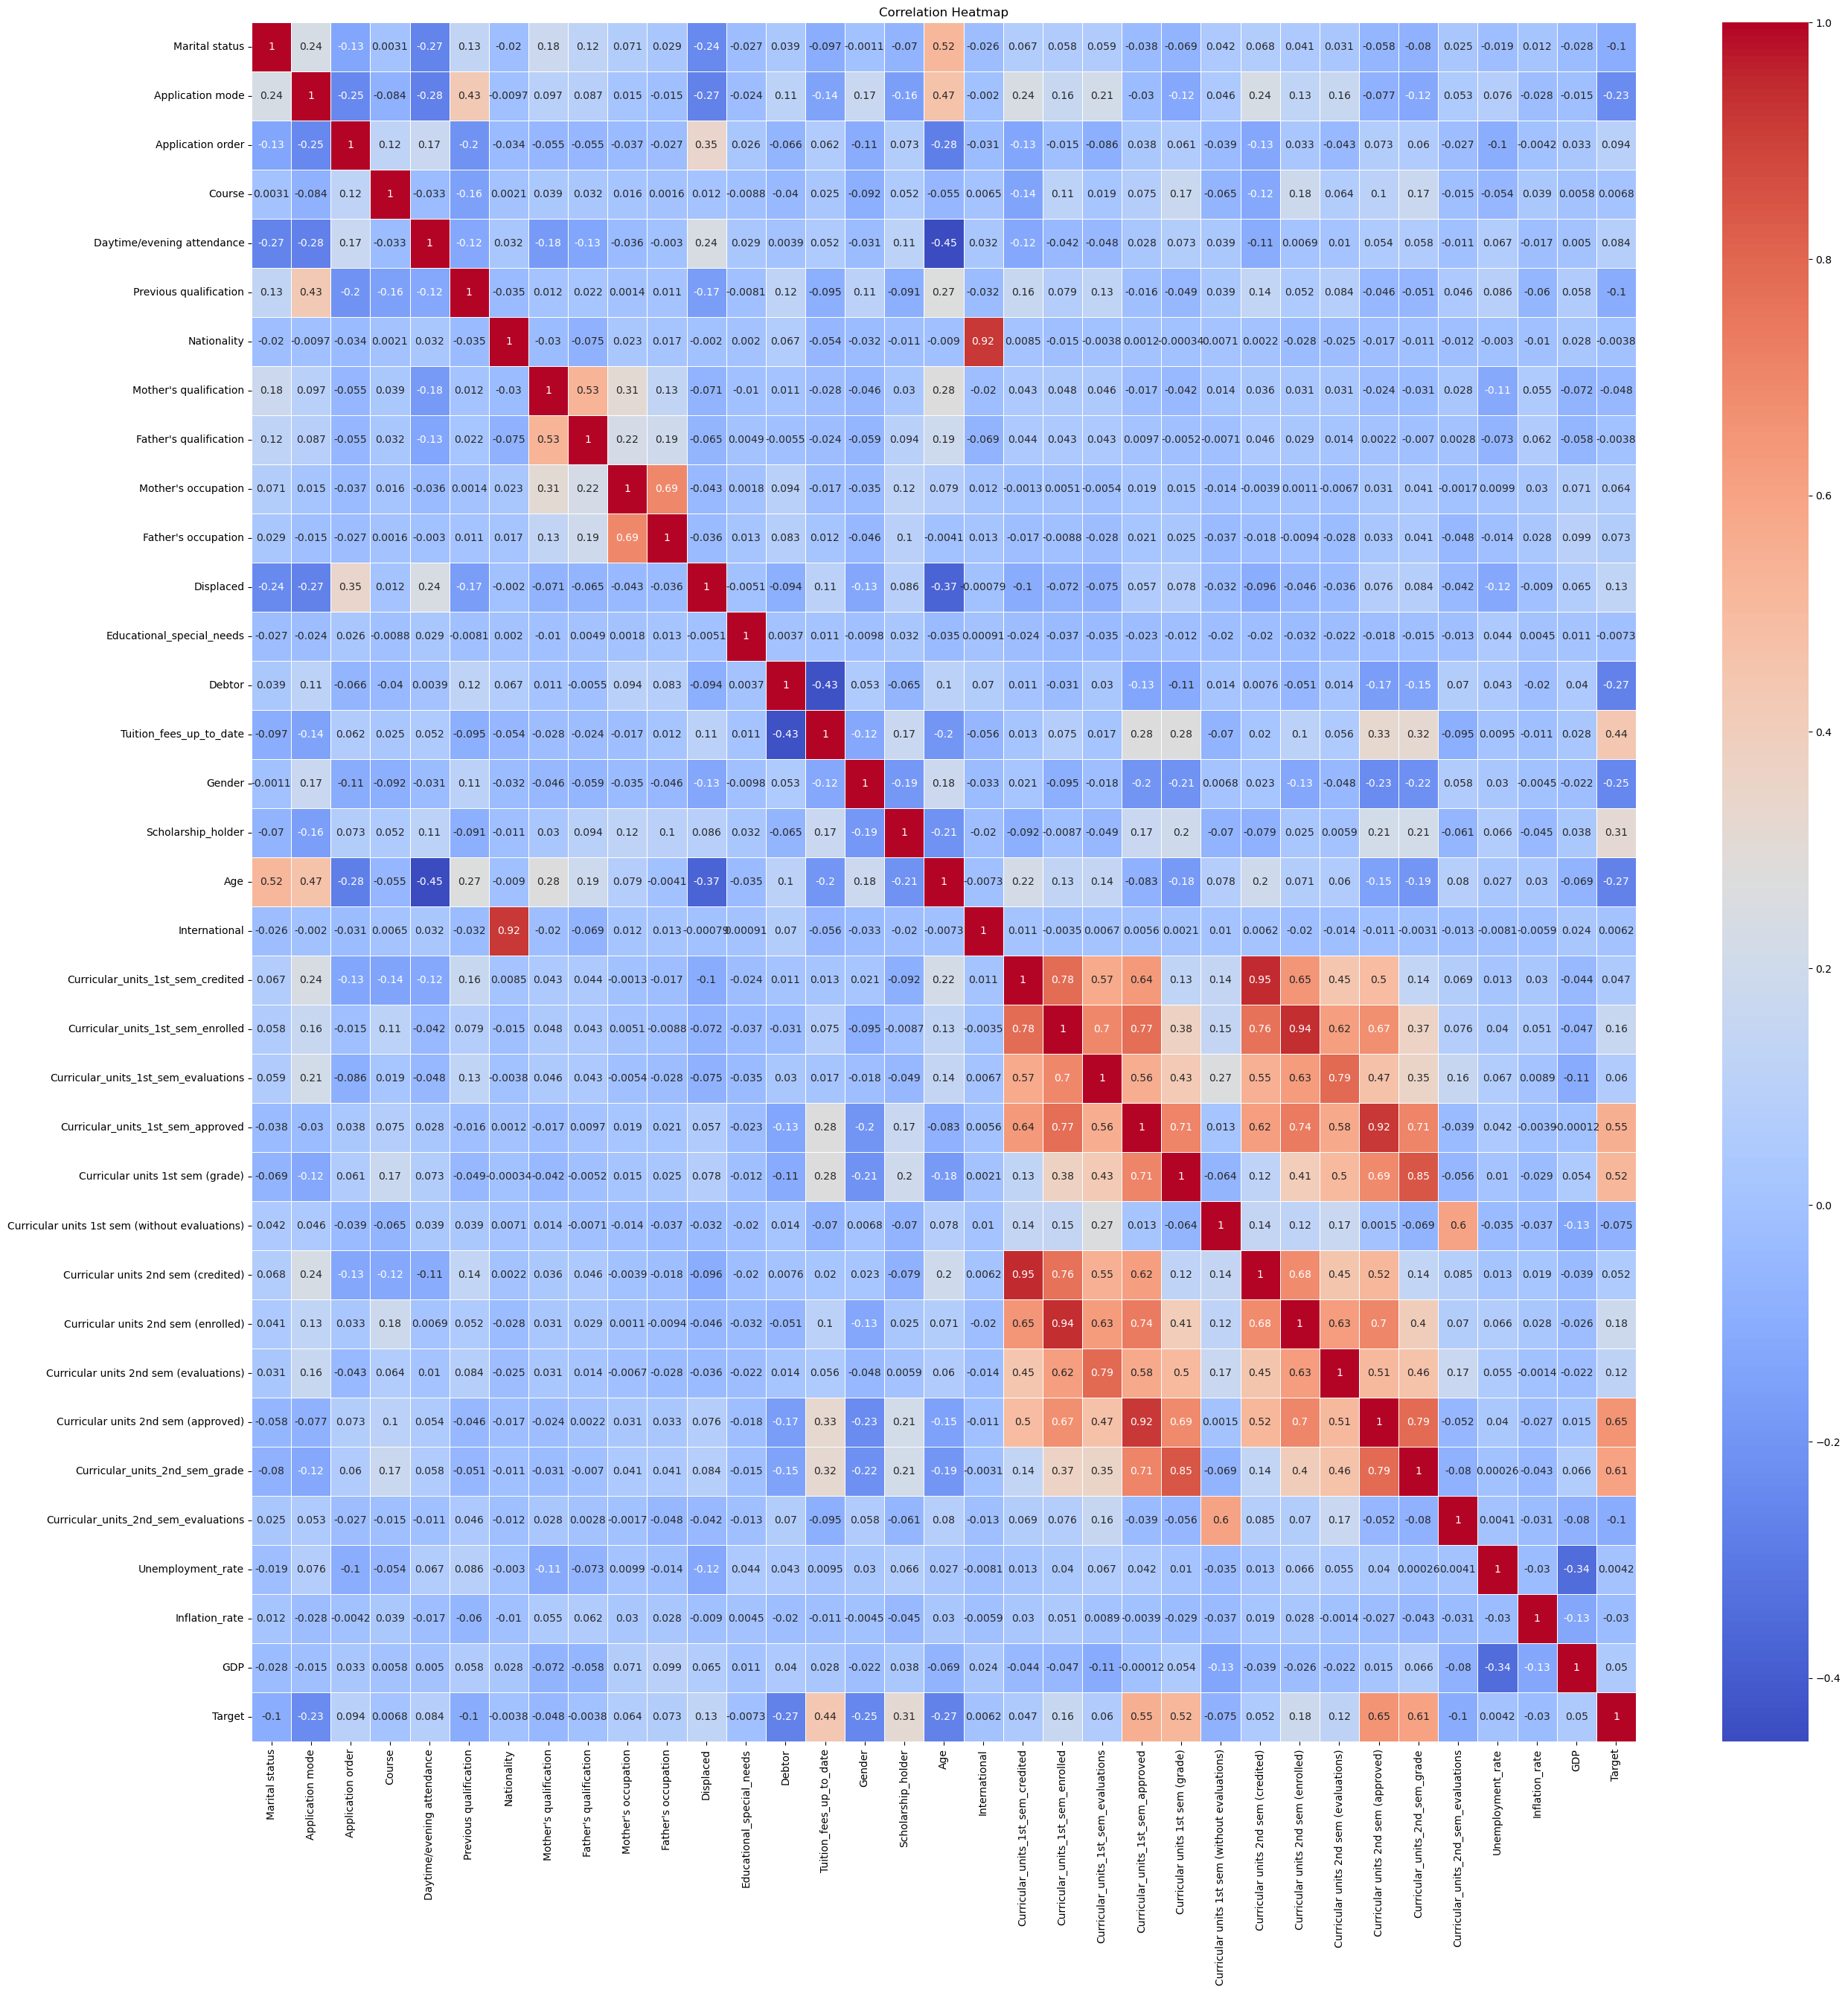

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
plt.figure(figsize=(30, 30))
sns.heatmap(data_normalized.corr() , annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif

# Assuming the last column is the target variable and the rest are features
X = data_normalized.iloc[:, :-1].values
y = data_normalized.iloc[:, -1].values

# Get the column names
feature_names = data_normalized.columns[:-1]

# Calculate Fisher's Score
fisher_scores, p_values = f_classif(X, y)

# Sort features based on Fisher's Score in descending order
sorted_indices = np.argsort(fisher_scores)[::-1]

# Select the top k features (you can change the value of k)
k = 10 
selected_indices = sorted_indices[:k]

# Print selected features along with their scores
print("Selected Features:")
for idx in selected_indices:
    print(f"Feature: {feature_names[idx]}, Fisher's Score: {fisher_scores[idx]}")

# If you want to transform your original data to keep only the selected features
X_selected = SelectKBest(f_classif, k=k).fit_transform(X, y)


Selected Features:
Feature: Curricular units 2nd sem (approved), Fisher's Score: 2711.4408735016937
Feature: Curricular_units_2nd_sem_grade, Fisher's Score: 2098.450927126041
Feature: Curricular_units_1st_sem_approved, Fisher's Score: 1613.962251302041
Feature: Curricular units 1st sem (grade), Fisher's Score: 1344.0710395416522
Feature: Tuition_fees_up_to_date, Fisher's Score: 881.5527959726716
Feature: Scholarship_holder, Fisher's Score: 394.084022118948
Feature: Age, Fisher's Score: 279.0052761622982
Feature: Debtor, Fisher's Score: 278.955392792431
Feature: Gender, Fisher's Score: 245.92127699755932
Feature: Application mode, Fisher's Score: 209.9499186978011


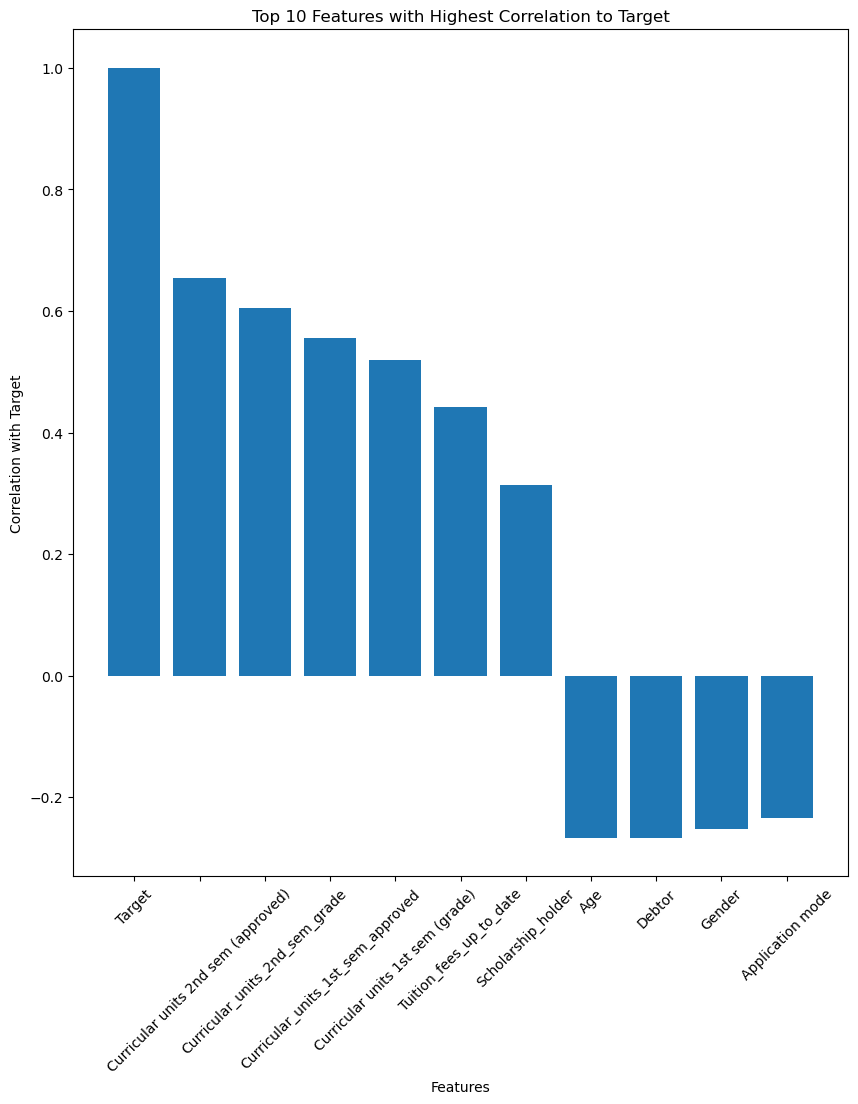

In [ ]:
correlations = data_normalized.corr()['Target']
top_10_features = correlations.abs().nlargest(11).index
top_10_corr_values = correlations[top_10_features]

plt.figure(figsize=(10, 11))
plt.bar(top_10_features, top_10_corr_values)
plt.xlabel('Features')
plt.ylabel('Correlation with Target')
plt.title('Top 10 Features with Highest Correlation to Target')
plt.xticks(rotation=45)
plt.show()

In [ ]:
new_data = data_normalized.iloc[:,[11,12,13,14,16,17,18,19,20,21,22,27,29,31,32,33,34]]

In [ ]:
new_data.head()

Displaced  Educational_special_needs  Debtor  Tuition_fees_up_to_date  \
0        1.0                        0.0     0.0                      1.0   
1        1.0                        0.0     0.0                      0.0   
2        1.0                        0.0     0.0                      0.0   
3        1.0                        0.0     1.0                      0.0   
4        1.0                        0.0     0.0                      1.0   

   Scholarship_holder       Age  International  \
0                 0.0  0.056604            0.0   
1                 0.0  0.037736            0.0   
2                 0.0  0.094340            0.0   
3                 0.0  0.018868            0.0   
4                 0.0  0.037736            0.0   

   Curricular_units_1st_sem_credited  Curricular_units_1st_sem_enrolled  \
0                                0.0                           0.000000   
1                                0.0                           0.230769   
2                                0.0                           0.192308   
3                                0.0                           0.230769   
4                                0.0                           0.230769   

   Curricular_units_1st_sem_evaluations  Curricular_units_1st_sem_approved  \
0                              0.000000                           0.000000   
1                              0.000000                           0.000000   
2                              0.111111                           0.000000   
3                              0.200000                           0.192308   
4                              0.133333                           0.000000   

   Curricular units 2nd sem (evaluations)  Curricular_units_2nd_sem_grade  \
0                                0.000000                        0.000000   
1                                0.000000                        0.000000   
2                                0.151515                        0.000000   
3                                0.424242                        0.726923   
4                                0.000000                        0.000000   

   Unemployment_rate  Inflation_rate       GDP  Target  
0           0.372093        0.488889  0.766182       0  
1           0.372093        0.488889  0.766182       0  
2           0.918605        0.800000  0.000000       0  
3           0.151163        0.488889  1.000000       0  
4           0.593023        1.000000  0.311757       0

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Displaced                               3630 non-null   float64
 1   Educational_special_needs               3630 non-null   float64
 2   Debtor                                  3630 non-null   float64
 3   Tuition_fees_up_to_date                 3630 non-null   float64
 4   Scholarship_holder                      3630 non-null   float64
 5   Age                                     3630 non-null   float64
 6   International                           3630 non-null   float64
 7   Curricular_units_1st_sem_credited       3630 non-null   float64
 8   Curricular_units_1st_sem_enrolled       3630 non-null   float64
 9   Curricular_units_1st_sem_evaluations    3630 non-null   float64
 10  Curricular_units_1st_sem_approved       3630 non-null   floa

In [ ]:
# How many dropouts, enrolled & graduates are there in Target column
new_data['Target'].value_counts()

Target
1    2209
0    1421
Name: count, dtype: int64

In [ ]:
x = new_data['Target'].value_counts().index
y = new_data['Target'].value_counts().values

df = pd.DataFrame({
    'Target': x,
    'Count_T' : y
})

fig = px.pie(df,
             names ='Target',
             values ='Count_T',
            title='How many dropouts, enrolled & graduates are there in Target column')

fig.update_traces(labels=['Graduate','Dropout','Enrolled'], hole=0.4,textinfo='value+label', pull=[0,0.2,0.1])
fig.show()

In [ ]:
px.histogram(new_data['Age'], x='Age',color_discrete_sequence=['lightblue'])

In [ ]:
# Now see the corelation of Target with the rest
new_data.corr()['Target']

Displaced                                 0.126113
Educational_special_needs                -0.007254
Debtor                                   -0.267207
Tuition_fees_up_to_date                   0.442138
Scholarship_holder                        0.313018
Age                                      -0.267229
International                             0.006181
Curricular_units_1st_sem_credited         0.046900
Curricular_units_1st_sem_enrolled         0.161074
Curricular_units_1st_sem_evaluations      0.059786
Curricular_units_1st_sem_approved         0.554881
Curricular units 2nd sem (evaluations)    0.119239
Curricular_units_2nd_sem_grade            0.605350
Unemployment_rate                         0.004198
Inflation_rate                           -0.030326
GDP                                       0.050260
Target                                    1.000000
Name: Target, dtype: float64

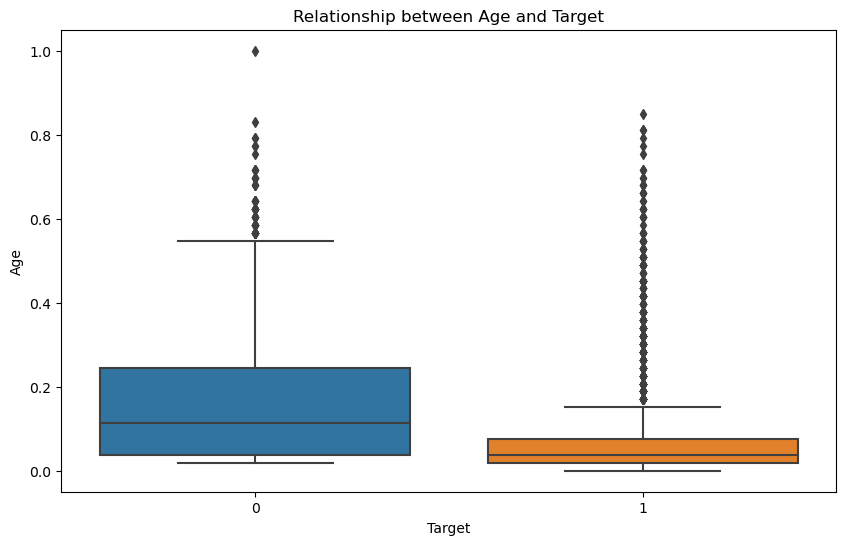

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='Age', data=new_data)
plt.xlabel('Target')
plt.ylabel('Age')
plt.title('Relationship between Age and Target')
plt.show()


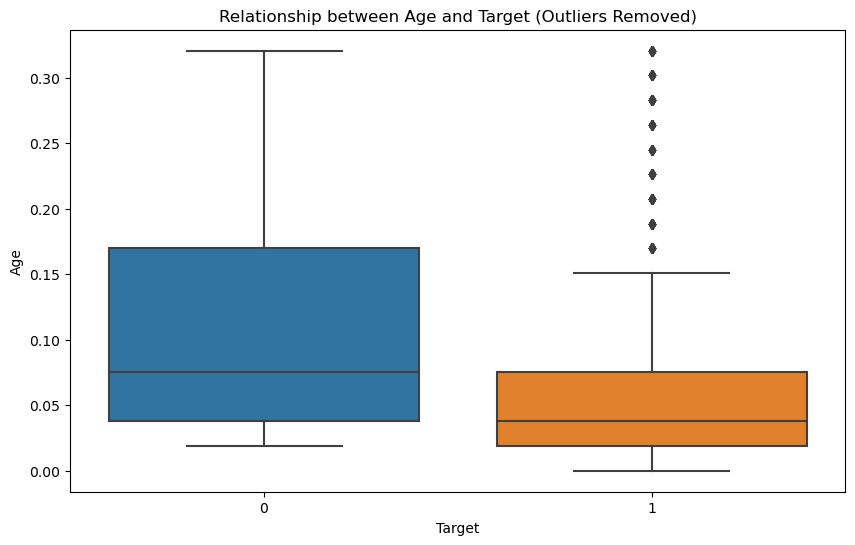

In [ ]:
# import matplotlib.pyplot as plt

# Assuming 'Age' is the column with outliers
Q1 = new_data['Age'].quantile(0.25)
Q3 = new_data['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows where 'Age' is outside the bounds
filtered_data = new_data[(new_data['Age'] >= lower_bound) & (new_data['Age'] <= upper_bound)]

# Create a boxplot without outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='Age', data=filtered_data)
plt.xlabel('Target')
plt.ylabel('Age')
plt.title('Relationship between Age and Target (Outliers Removed)')
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

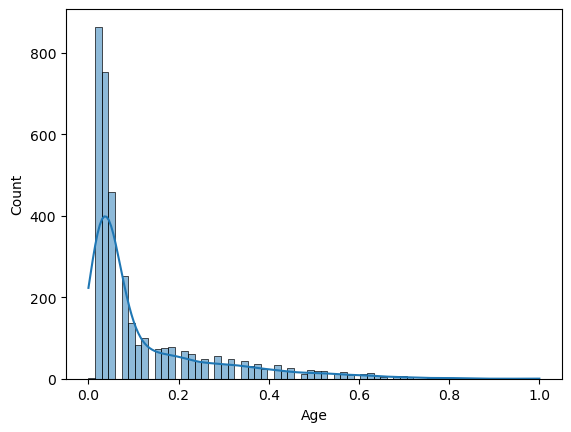

In [ ]:
# Distribution of age of students at the time of enrollment
sns.histplot(data=new_data['Age'], kde=True)

In [ ]:
# Let's try plotly histogram for interactive figure
px.histogram(new_data['Age'], x='Age',color_discrete_sequence=['red'])


In [ ]:
X = new_data.drop('Target', axis=1)
y = new_data['Target']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
dtree = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=2)
lr = LogisticRegression(random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1, random_state=0)
xbc = XGBClassifier(tree_method='gpu_hist')
svm = SVC(kernel='linear',probability=True)

In [ ]:
# List of models
models = [dtree, rfc, lr, knn, abc, svm, xbc]

In [ ]:
# Perform cross-validation for each model
for model in models:
    model_name = model.__class__.__name__
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
    mean_accuracy = round(scores.mean() * 100, 2)
    print(f"{model_name} - Mean Cross-Validation Accuracy: {mean_accuracy}%")


DecisionTreeClassifier - Mean Cross-Validation Accuracy: 84.16%
RandomForestClassifier - Mean Cross-Validation Accuracy: 89.56%
LogisticRegression - Mean Cross-Validation Accuracy: 87.8%
KNeighborsClassifier - Mean Cross-Validation Accuracy: 85.7%
AdaBoostClassifier - Mean Cross-Validation Accuracy: 89.15%
SVC - Mean Cross-Validation Accuracy: 87.93%
XGBClassifier - Mean Cross-Validation Accuracy: 88.62%


In [ ]:
# Train each model on the training set
for model in models:
    model.fit(X_train, y_train)

In [ ]:
# Evaluate on the test set
for model in models:
    model_name = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    print(f"{model_name} - Test Set Accuracy: {accuracy}%")

DecisionTreeClassifier - Test Set Accuracy: 81.4%
RandomForestClassifier - Test Set Accuracy: 87.74%
LogisticRegression - Test Set Accuracy: 87.74%
KNeighborsClassifier - Test Set Accuracy: 85.95%
AdaBoostClassifier - Test Set Accuracy: 88.98%
SVC - Test Set Accuracy: 87.6%
XGBClassifier - Test Set Accuracy: 86.5%


In [ ]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier 

def predict_target(
    Displaced,
    Educational_special_needs,
    Debtor,
    Age,
    Tuition_fees_up_to_date,
    Scholarship_holder,
    International,
    Curricular_units_1st_sem_credited,
    Curricular_units_1st_sem_enrolled,
    Curricular_units_1st_sem_evaluations,
    Curricular_units_1st_sem_approved,
    Curricular_units_2nd_sem_evaluations,
    Curricular_units_2nd_sem_grade,
    Unemployment_rate,
    Inflation_rate,
    GDP,
):
    # Prepare the input data for prediction
    data = {
        "Displaced": [Displaced],
        "Educational_special_needs": [Educational_special_needs],
        "Debtor": [Debtor],
        "Age":[Age],
        "Tuition_fees_up_to_date": [Tuition_fees_up_to_date],
        "Scholarship_holder": [Scholarship_holder],
        "International": [International],
        "Curricular_units_1st_sem_credited": [Curricular_units_1st_sem_credited],
        "Curricular_units_1st_sem_enrolled": [Curricular_units_1st_sem_enrolled],
        "Curricular_units_1st_sem_evaluations": [Curricular_units_1st_sem_evaluations],
        "Curricular_units_1st_sem_approved": [Curricular_units_1st_sem_approved],
        "Curricular_units_2nd_sem_evaluations": [Curricular_units_2nd_sem_evaluations],
        "Curricular_units_2nd_sem_grade": [Curricular_units_2nd_sem_grade],
        "Unemployment_rate": [Unemployment_rate],
        "Inflation_rate": [Inflation_rate],
        "GDP": [GDP],
#         "Target":[Target]
    }
    # df = pd.DataFrame(new_data)

    # Load the trained model
    model = AdaBoostClassifier(n_estimators=50,learning_rate=1, random_state=0)  # Replace with your trained model

    # X = new_data.drop('Target', axis=1)
    # y = new_data['Target']


    # # Fit the model with training data (replace with appropriate training data)
    # X_train = X  # Replace with your training data
    # y_train = y  # Replace with your training data
    model.fit(X_train, y_train)

    # Make the prediction
    y_pred = model.predict(X_test)

    # Print the result
    print(f"The predicted target is: {y_pred[1]}")
    return y_pred[1]

predict_target(
    Displaced = 1,
    Educational_special_needs = 0,
    Debtor = 0,
    Age=20,
    Tuition_fees_up_to_date = 1,
    Scholarship_holder=0,
    International=0,
    Curricular_units_1st_sem_credited=0,
    Curricular_units_1st_sem_enrolled=0,
    Curricular_units_1st_sem_evaluations=0,
    Curricular_units_1st_sem_approved=0,
    Curricular_units_2nd_sem_evaluations=0,
    Curricular_units_2nd_sem_grade = 0,
    Unemployment_rate =10.8,
    Inflation_rate = 1.4,
    GDP=1.74,)
#     Target = 0

The predicted target is: 0


In [ ]:
import tkinter as tk
import pandas as pd
import joblib
from tkinter import messagebox

# loaded_model = joblib.load('hotelBehavior.pkl')

# Create the GUI
root = tk.Tk()
root.configure(background='light blue')
root.title('Title') # write the question
root.geometry('1000x1000')

# Replace the input fields with the provided list of features
features = [
    'Displaced', 'Educational_special_needs', 'Debtor', 'Age', 'Tuition_fees_up_to_date', 'Scholarship_holder',
    'International', 'Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_approved', 'Curricular_units_2nd_sem_evaluations',
    'Curricular_units_2nd_sem_grade', 'Unemployment_rate', 'Inflation_rate', 'GDP'
]

entries = {}
for idx, feature in enumerate(features):
    label = tk.Label(root, text=f'Enter {feature}:', font=('Arial', 12))
    label.grid(row=idx, column=0, padx=10, pady=10, sticky=tk.W)
    entry = tk.Entry(root, font=('Arial', 12))
    entry.grid(row=idx, column=1, padx=10, pady=10)
    entries[feature] = entry

# Update the predict_cancellation function to retrieve inputs for all features
def predict_cancellation():
    inputs = []
    for feature in features:
        value = entries[feature].get()
        # Handle conversion to appropriate data types if needed (e.g., int, float)
        inputs.append(float(value))  # Assuming all inputs are numeric, adjust as needed

    # Apply the model with the inputs
    prediction = predict_target(Displaced = inputs[0],
    Educational_special_needs = inputs[1],
    Debtor = inputs[2],
    Age = inputs[3],
    Tuition_fees_up_to_date = inputs[4],
    Scholarship_holder = inputs[5],
    International = inputs[6],
    Curricular_units_1st_sem_credited = inputs[7],
    Curricular_units_1st_sem_enrolled = inputs[8],
    Curricular_units_1st_sem_evaluations = inputs[9],
    Curricular_units_1st_sem_approved = inputs[10],
    Curricular_units_2nd_sem_evaluations = inputs[11],
    Curricular_units_2nd_sem_grade = inputs[12],
    Unemployment_rate = inputs[13],
    Inflation_rate = inputs[14],
    GDP = inputs[15])

    # Display the result to the user
    if prediction == 1:
        result_label.config(text='true', bg="green", fg='white')
    else:
        result_label.config(text='false', bg="red", fg='white')


# # Replace the input() statements with the following code
# no_of_adults_label = tk.Label(root, text='Enter the number of adults:', font=('Arial', 12))
# no_of_adults_entry = tk.Entry(root, font=('Arial', 12))
# no_of_adults_label.grid(row=10, column=0, padx=10, pady=10, sticky=tk.W)
# no_of_adults_entry.grid(row=10, column=1, padx=10, pady=10)

# Create the classify button
classify_button = tk.Button(root, text='Check', command=predict_cancellation)
classify_button.grid(row=27, column=0, columnspan=2)

# Create the result label
result_label = tk.Label(root, text='')
result_label.grid(row=28, column=0, columnspan=2)

# Run the GUI
root.mainloop()

The predicted target is: 0


In [ ]:
# dtree.fit(X_train,y_train)
# rfc.fit(X_train,y_train)
# lr.fit(X_train,y_train)
# knn.fit(X_train,y_train)
# abc.fit(X_train, y_train)
# xbc.fit(X_train, y_train)
# svm.fit(X_train, y_train)

In [ ]:
# y_pred = dtree.predict(X_test)
# print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

In [ ]:
# y_pred = rfc.predict(X_test)
# print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

In [ ]:
# y_pred = lr.predict(X_test)
# print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

In [ ]:
# y_pred = knn.predict(X_test)
# print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

In [ ]:
# y_pred = abc.predict(X_test)
# print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

In [ ]:
# y_pred = svm.predict(X_test)
# print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

In [ ]:
# y_pred = xbc.predict(X_test)
# print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

In [ ]:
# param_grid = {
#    'bootstrap': [False,True],
#    'max_depth': [5,8,10, 20],
#    'max_features': [3, 4, 5, None],
#    'min_samples_split': [2, 10, 12],
#    'n_estimators': [100, 200, 300]
# }

# clf = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 1)

# clf.fit(X_train,y_train)
# y_pred = clf.predict(X_test)
# print("Accuracy: ",accuracy_score(y_test,y_pred))
# print(clf.best_params_)
# print(clf.best_estimator_)

In [ ]:
# ens1 = VotingClassifier(estimators=[('rfc', rfc), ('lr', lr), ('abc',abc), ('xbc',xbc)], voting='soft')
# ens1.fit(X_train, y_train)

# y_pred = ens1.predict(X_test)
# print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

In [ ]:
# ens2 = VotingClassifier(estimators=[('rfc', rfc), ('lr', lr), ('abc',abc), ('xbc',xbc)], voting='hard')
# ens2.fit(X_train, y_train)

# y_pred = ens2.predict(X_test)
# print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.feature_selection import SelectKBest, f_classif
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import cross_val_score


# # Separate features and target variable
# X = data.drop(columns=['Target'])
# y = data['Target']

# # Optional: Feature selection using SelectKBest with Fisher's Score
# k_best = SelectKBest(f_classif, k=15)  # Adjust the value of k as needed
# X_selected = k_best.fit_transform(X, y)

# # Initialize your machine learning model
# model = RandomForestClassifier()  # Replace with your chosen model

# # Perform cross-validation
# scores = cross_val_score(model, X_selected, y, cv=5)  # 5-fold cross-validation

# # Print the cross-validation scores
# print("Cross-Validation Scores:", scores)
# print("Mean Cross-Validation Score:", np.mean(scores))